In [33]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from collections import Counter
import pickle

In [36]:
layer1 = keras.layers.Dense(30)
layer2 = keras.layers.Dense(30)
layer1.build((None, 30))  # Create the weights
layer2.build((None, 30))  # Create the weights
print("weights:", len(layer1.weights))
print("trainable_weights:", len(layer1.trainable_weights))
print("non_trainable_weights:", len(layer1.non_trainable_weights))

print("weights:", len(layer2.weights))
print("trainable_weights:", len(layer2.trainable_weights))
print("non_trainable_weights:", len(layer2.non_trainable_weights))

weights: 2
trainable_weights: 2
non_trainable_weights: 0
weights: 2
trainable_weights: 2
non_trainable_weights: 0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from collections import Counter
import pickle

In [6]:
dataset_path1 = "C:\\Users\\hp-pc\\Desktop\\GRP\\sim_data\\moth\\moth_total\\moth_total.csv"

In [7]:
df_moth = pd.read_csv(dataset_path1, index_col=False)

In [8]:
df_moth

,time,windvx,windvy,con,detection,posx,posy,yaw,v,yaw_c,behavior,declare,time_out,termination
0,0,1.06243,-0.000094,0.095689,1,82.9380,-2.69365,-111.559,1.000280,-180.0050,1,0,0,0
1,1,1.06628,-0.000175,0.122268,1,82.4698,-3.57635,-134.588,0.999740,-180.0090,1,0,0,0
2,2,1.06973,-0.000267,0.123117,1,81.7358,-4.27575,-154.369,0.999860,-180.0140,1,0,0,0
3,3,1.07339,-0.000367,0.106525,1,80.8518,-4.75450,-162.096,0.999944,-180.0200,1,0,0,0
4,4,1.07784,-0.000486,0.118507,1,79.9105,-5.09579,-165.942,0.999946,-260.0260,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362164,36,1.91449,0.064206,3.319730,1,31.9183,-13.72340,161.831,1.000250,261.9170,1,0,0,0
362165,37,1.91312,0.069797,2.583560,1,30.9352,-13.51610,-173.445,1.000580,-97.9122,2,0,0,0
362166,38,1.91149,0.074357,0.030929,1,29.9309,-13.62450,-156.950,1.000570,-177.7730,1,0,0,0
362167,39,1.90994,0.077429,0.464106,1,28.9915,-13.98410,-148.021,1.000380,-97.6792,2,0,0,0


In [9]:
df_moth.time_out==1

0         False
1         False
2         False
3         False
4         False
          ...  
362164    False
362165    False
362166    False
362167    False
362168    False
Name: time_out, Length: 362169, dtype: bool

In [10]:
num_trial = len(df_moth[df_moth['termination'] == 1])
num_D_trial = len(df_moth[df_moth['declare'] == 1])
num_TO_trial = len(df_moth[df_moth['time_out'] == 1])

In [11]:
trial_start = []
trial_D_start = []

In [12]:
for i in range(df_moth.shape[0]):
    if df_moth['time'].iloc[i] == 0:
        trial_start.append(i)
    if df_moth['termination'].iloc[i] == 1:
        trial_D_start.append(i)

In [13]:
df_moth

,time,windvx,windvy,con,detection,posx,posy,yaw,v,yaw_c,behavior,declare,time_out,termination
0,0,1.06243,-0.000094,0.095689,1,82.9380,-2.69365,-111.559,1.000280,-180.0050,1,0,0,0
1,1,1.06628,-0.000175,0.122268,1,82.4698,-3.57635,-134.588,0.999740,-180.0090,1,0,0,0
2,2,1.06973,-0.000267,0.123117,1,81.7358,-4.27575,-154.369,0.999860,-180.0140,1,0,0,0
3,3,1.07339,-0.000367,0.106525,1,80.8518,-4.75450,-162.096,0.999944,-180.0200,1,0,0,0
4,4,1.07784,-0.000486,0.118507,1,79.9105,-5.09579,-165.942,0.999946,-260.0260,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362164,36,1.91449,0.064206,3.319730,1,31.9183,-13.72340,161.831,1.000250,261.9170,1,0,0,0
362165,37,1.91312,0.069797,2.583560,1,30.9352,-13.51610,-173.445,1.000580,-97.9122,2,0,0,0
362166,38,1.91149,0.074357,0.030929,1,29.9309,-13.62450,-156.950,1.000570,-177.7730,1,0,0,0
362167,39,1.90994,0.077429,0.464106,1,28.9915,-13.98410,-148.021,1.000380,-97.6792,2,0,0,0


In [14]:
len(trial_start)

5994

In [15]:
df_moth.pop('declare')
df_moth.pop('termination')
df_moth.pop('time_out')
df_moth.pop('time')
df_moth.pop('posx')
df_moth.pop('posy')
df_moth.pop('yaw')
df_moth.pop('v')
df_moth.pop('behavior')

0         1
1         1
2         1
3         1
4         2
         ..
362164    1
362165    2
362166    1
362167    2
362168    2
Name: behavior, Length: 362169, dtype: int64

In [16]:
# convert negative yaw command to positive

def change_yaw(x):
    if x < 0:
        x += 360
    return x

In [13]:
df_moth['yaw_c'] = df_moth['yaw_c'].apply(change_yaw)
yaw_c1 = df_moth.pop("yaw_c")
yaw_c2 = yaw_c1 * np.pi / 180
df_moth['Cx'] = np.cos(yaw_c2)
df_moth['Cy'] = np.sin(yaw_c2)

In [14]:
num_features = df_moth.shape[1]
num_features = df_moth.shape[0]

In [15]:
mean = df_moth.mean()
std = df_moth.std()
df_moth = (df_moth - mean) / std

In [16]:
df_moth

,windvx,windvy,con,detection,Cx,Cy
0,-0.158027,-0.050691,-0.171074,0.956006,-1.092078,0.049595
1,-0.150319,-0.051391,-0.122757,0.956006,-1.092078,0.049695
2,-0.143412,-0.052177,-0.121213,0.956006,-1.092078,0.049820
3,-0.136085,-0.053031,-0.151375,0.956006,-1.092078,0.049971
4,-0.127176,-0.054051,-0.129594,0.956006,0.164216,1.461405
...,...,...,...,...,...,...
362164,1.547810,0.499258,5.689821,0.956006,0.213742,-1.369889
362165,1.545068,0.547082,4.351558,0.956006,0.218227,-1.370484
362166,1.541804,0.586083,-0.288799,0.956006,-1.090931,-0.006238
362167,1.538701,0.612357,0.498661,0.956006,0.224349,-1.371275


In [17]:
train_df = df_moth[0:int(len(df_moth) * 0.8)]
val_df = df_moth[int(len(df_moth) * 0.8):int(len(df_moth) * 0.9)]
test_df = df_moth[int(len(df_moth) * 0.9):]

In [18]:
# define the window_generator function
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df, val_df, test_df,
                 label_columns=None,
                 input_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        self.input_columns = input_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Input column names: {self.input_columns}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
        if self.input_columns is not None:
            inputs = tf.stack(
                [inputs[:, :, self.column_indices[name]] for name in self.input_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=16, )

        ds = ds.map(self.split_window)

        return ds
    
    # convert DataFrame into Dataset
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    # fetch an example batch for plotting
    def example(self):
        # by default, call example function returns None
        result = getattr(self, '_example', None)
        if result is None:
            # no example batch was found, so get one from the '.train' dataset
            # iter: creates an iterator object
            result = next(iter(self.train))
            # and cache it for the next time
            self._example = result

        return result

    def plot(self, model=None, plot_col='Yaw_e', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        # find the index of the column that the user wants to plot
        plot_col_index = self.column_indices[plot_col]
        # only plots maximal 3 batches of data
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n + 1)
            plt.ylabel(f'{plot_col}[normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                # get: method returns the value of the item (index) with the specified key (name)
                # get(keyname, value=None)
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                # with the continue statement, we can stop the current iteration of the for loop
                # and continue with the next
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index], edgecolors='k',
                        label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)
            if n == 0:
                plt.legend()

        plt.xlabel('Time[s]')
        plt.show()


In [19]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history


In [20]:
columns = df_moth.columns
label_columns = ['Cx', 'Cy']
input_columns = list((Counter(columns) - Counter(label_columns)).elements())
num_inputs = len(input_columns)

In [21]:
filter_size = 64
lstm_model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
        tf.keras.layers.LSTM(256, return_sequences=True),
        tf.keras.layers.LSTM(256, return_sequences=True),
        # Shape => [batch, time, features]
        tf.keras.layers.Dense(units=filter_size, activation='relu'),
        tf.keras.layers.Dense(units=filter_size, activation='relu'),
        tf.keras.layers.Dense(units=2)
    ])

In [22]:
CONV_WIDTH = 6

lstm_window = WindowGenerator(
        input_width=CONV_WIDTH,
        label_width=CONV_WIDTH,
        shift=0,
        train_df=train_df,
        test_df=test_df,
        val_df=val_df,
        label_columns=label_columns,
        input_columns=input_columns
    )

In [23]:
history = compile_and_fit(lstm_model, lstm_window)

val_performance = lstm_model.evaluate(lstm_window.test)
print(val_performance, sum(val_performance))


Epoch 1/20
18109/18109 [==============================] - 532s 29ms/step - loss: 0.7477 - mean_absolute_error: 0.7043 - val_loss: 0.7271 - val_mean_absolute_error: 0.6799
Epoch 2/20
18109/18109 [==============================] - 528s 29ms/step - loss: 0.7355 - mean_absolute_error: 0.6929 - val_loss: 0.7229 - val_mean_absolute_error: 0.6790
Epoch 3/20
18109/18109 [==============================] - 540s 30ms/step - loss: 0.7303 - mean_absolute_error: 0.6885 - val_loss: 0.7212 - val_mean_absolute_error: 0.6779
Epoch 4/20
18109/18109 [==============================] - 512s 28ms/step - loss: 0.7224 - mean_absolute_error: 0.6829 - val_loss: 0.7201 - val_mean_absolute_error: 0.6759
Epoch 5/20
18109/18109 [==============================] - 533s 29ms/step - loss: 0.7096 - mean_absolute_error: 0.6742 - val_loss: 0.7183 - val_mean_absolute_error: 0.6711
Epoch 6/20
18109/18109 [==============================] - 501s 28ms/step - loss: 0.6992 - mean_absolute_error: 0.6669 - val_loss: 0.7168 - val_me

In [25]:
model_selection = 'RNN'
dataset = 'moth'
model_path = "C:/Users/hp-pc/Desktop/GRP/{}/sim_data/{}/".format(model_selection, dataset)
mean_path = 'C:/Users/hp-pc/Desktop/GRP/{}/sim_data/{}/'.format(model_selection, dataset)

lstm_model.save(model_path+'rnn_nocon.h5',
                include_optimizer=False)
# save train_mean and train_std
np.savetxt(mean_path+'mean.txt', mean)
np.savetxt(mean_path+'std.txt', std)

TransferLearning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [3]:
dataset_path2 = "C:\\Users\\hp-pc\\Desktop\\GRP\\real_data\\moth\\moth_total\\moth_total.csv"

In [4]:
df_moth_real = pd.read_csv(dataset_path2, index_col=False)

NameError: name 'pd' is not defined

In [ ]:
df_moth_real

Preprocessing & Cleansing

In [29]:
df_moth_real = df_moth_real.dropna()
df_moth_real.pop('time')
df_moth_real.pop('posx')
df_moth_real.pop('posy')
df_moth_real.pop('yaw')
df_moth_real.pop('yaw_error')

0       -64.979655
1       -64.981916
2       -25.000000
3        -9.000000
4        -4.000000
           ...    
13694    -6.581422
13695    -6.184947
13696    -5.723173
13697    -5.343430
13698    -5.063220
Name: yaw_error, Length: 13699, dtype: float64

In [30]:
def change_yaw(x):
    if x < 0:
        x += 360
    return x

df_moth_real['yaw_c'] = df_moth_real['yaw_c'].apply(change_yaw)
yaw_c_real = df_moth_real.pop("yaw_c")
yaw_c_real = yaw_c_real * np.pi / 180 # deg to rad
df_moth_real['Cx'] = np.cos(yaw_c_real)
df_moth_real['Cy'] = np.sin(yaw_c_real)

In [31]:
def change_winddir(x):
    if x < 0:
        x += 360
    return x

df_moth_real['winddir'] = df_moth_real['winddir'].apply(change_winddir)
winddir = df_moth_real.pop("winddir")
winddir = winddir * np.pi / 180
df_moth_real['windvx'] = df_moth_real['windv']*np.cos(winddir)
df_moth_real['windvy'] = df_moth_real['windv']*np.sin(winddir)

In [32]:
winddir = df_moth_real.pop("windv")
df_moth_real = df_moth_real[['windvx', 'windvy', 'con', 'detection', 'Cx', 'Cy']]

In [33]:
mean = df_moth_real.mean()
std = df_moth_real.std()

model_selection = 'RNN'
dataset = 'moth'
model_path = "C:/Users/hp-pc/Desktop/GRP/{}/sim_data/{}/".format(model_selection, dataset)
mean_path = 'C:/Users/hp-pc/Desktop/GRP/{}/sim_data/{}/'.format(model_selection, dataset)
np.savetxt(mean_path+'mean.txt', mean)
np.savetxt(mean_path+'std.txt', std)

df_moth_real = (df_moth_real - mean) / std

In [34]:
train_df_real = df_moth_real[0:int(len(df_moth_real) * 0.8)]
val_df_real = df_moth_real[int(len(df_moth_real) * 0.8):int(len(df_moth_real) * 0.9)]
test_df_real = df_moth_real[int(len(df_moth_real) * 0.9):]

In [35]:
shape = (6, 4)

base_model = tf.keras.applications.lstm_model(input_shape=shape,
                                               include_top=False)

base_model.trainable = False

In [36]:
# Let's take a look at the base model architecture
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 256)            267264    
                                                                 
 lstm_1 (LSTM)               (None, 6, 256)            525312    
                                                                 
 dense (Dense)               (None, 6, 64)             16448     
                                                                 
 dense_1 (Dense)             (None, 6, 64)             4160      
                                                                 
 dense_2 (Dense)             (None, 6, 2)              130       
                                                                 
Total params: 813,314
Trainable params: 0
Non-trainable params: 813,314
_________________________________________________________________


In [49]:
model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
        tf.keras.layers.LSTM(256, return_sequences=True),
        tf.keras.layers.LSTM(256, return_sequences=True),
        # Shape => [batch, time, features]
        tf.keras.layers.Dense(units=filter_size, activation='relu'),
        tf.keras.layers.Dense(units=filter_size, activation='relu'),
        tf.keras.layers.Dense(units=2)
    ])


In [38]:
prediction_layer = tf.keras.layers.Dense(2)
inputs = tf.keras.Input(shape=(6, 4))
#inputs=tf.Tensor(shape=(None, 6), dtype=tf.float32)
#x = lstm_model(inputs, training=False)
#x = global_average_layer(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(inputs)
model = tf.keras.Model(inputs, outputs)

In [50]:
model.compile(optimizer='rmsprop',
        loss= 'mae',
         metrics=['acc'])

In [51]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [52]:
history = compile_and_fit(model, lstm_window)

Epoch 1/20
18109/18109 [==============================] - 537s 29ms/step - loss: 0.7472 - mean_absolute_error: 0.7036 - val_loss: 0.7242 - val_mean_absolute_error: 0.6827
Epoch 2/20
18109/18109 [==============================] - 539s 30ms/step - loss: 0.7351 - mean_absolute_error: 0.6924 - val_loss: 0.7206 - val_mean_absolute_error: 0.6770
Epoch 3/20
18109/18109 [==============================] - 486s 27ms/step - loss: 0.7297 - mean_absolute_error: 0.6881 - val_loss: 0.7173 - val_mean_absolute_error: 0.6736
Epoch 4/20
18109/18109 [==============================] - 473s 26ms/step - loss: 0.7187 - mean_absolute_error: 0.6805 - val_loss: 0.7123 - val_mean_absolute_error: 0.6684
Epoch 5/20
18109/18109 [==============================] - 480s 27ms/step - loss: 0.7069 - mean_absolute_error: 0.6724 - val_loss: 0.7110 - val_mean_absolute_error: 0.6654
Epoch 6/20
18109/18109 [==============================] - 476s 26ms/step - loss: 0.6976 - mean_absolute_error: 0.6661 - val_loss: 0.7125 - val_me

In [17]:
model.save('C:\\Users\\hp-pc\\Desktop\\GRP\\Real-world test\\rnn_mothV4_{}.h5'.format(CONV_WIDTH), include_optimizer=False)

NameError: name 'model' is not defined

In [18]:
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

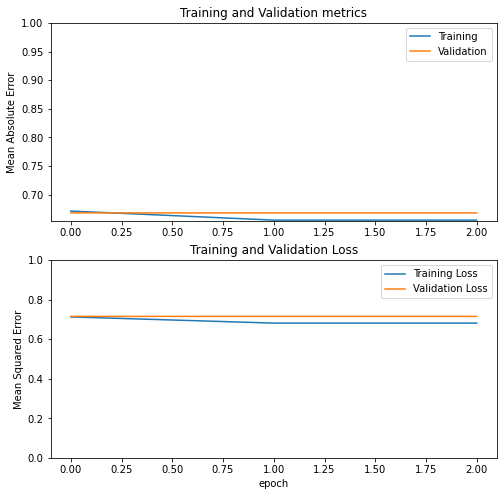

In [59]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend(loc='upper right')
plt.ylabel('Mean Absolute Error')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation metrics')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig("TL_moth_rnn.jpg")
plt.show()

Fine_Tuning

In [286]:
conv_model.trainable = True

In [288]:
len(conv_model.layers)

6

In [289]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 2

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  6


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])